### entrenando con mnist




In [1]:

import numpy as np



In [2]:
import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


11493376/11490434 [==============================] - 1s 0us/step


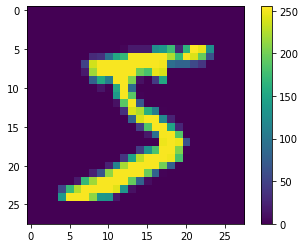

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


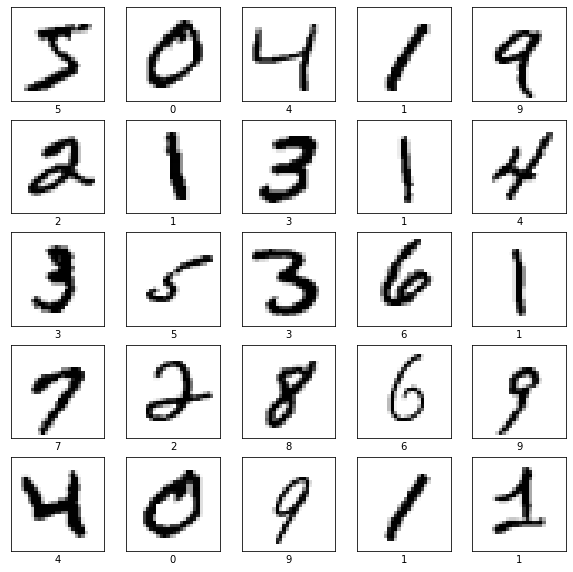

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [5]:
x_train =train_images/255.0
x_test =test_images/255.0

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

In [6]:
print(np.shape(x_train))
print(np.shape(y_train))

(60000, 28, 28)
(60000, 10)


In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


def Model1():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(512, activation='relu' ))
    model.add(Dense(100, activation='relu' ))
    
    model.add(Dense(10, activation='softmax'))
 
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model


def Model2():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(128, activation='relu' ))
    model.add(Dense(10, activation='softmax'))
 
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model


M=Model1()
M.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=M.fit(x_train, y_train,
          batch_size=100,
          epochs=40,validation_data=(x_test, y_test),
          verbose=1
          )

Epoch 1/40
600/600 [==============================] - 4s 7ms/step - loss: 0.9339 - accuracy: 0.7783 - val_loss: 0.4420 - val_accuracy: 0.8895
Epoch 2/40
600/600 [==============================] - 4s 7ms/step - loss: 0.3917 - accuracy: 0.8943 - val_loss: 0.3304 - val_accuracy: 0.9116
Epoch 3/40
600/600 [==============================] - 4s 7ms/step - loss: 0.3201 - accuracy: 0.9109 - val_loss: 0.2886 - val_accuracy: 0.9204
Epoch 4/40
600/600 [==============================] - 5s 8ms/step - loss: 0.2841 - accuracy: 0.9202 - val_loss: 0.2601 - val_accuracy: 0.9278
Epoch 5/40
600/600 [==============================] - 5s 8ms/step - loss: 0.2596 - accuracy: 0.9273 - val_loss: 0.2412 - val_accuracy: 0.9308
Epoch 6/40
600/600 [==============================] - 4s 7ms/step - loss: 0.2402 - accuracy: 0.9321 - val_loss: 0.2273 - val_accuracy: 0.9361
Epoch 7/40
600/600 [==============================] - 5s 8ms/step - loss: 0.2241 - accuracy: 0.9364 - val_loss: 0.2151 - val_accuracy: 0.9382
Epoch 

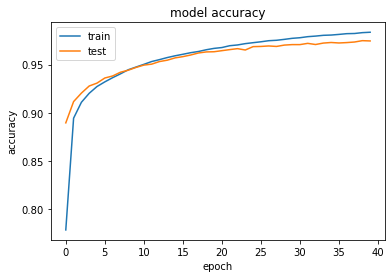

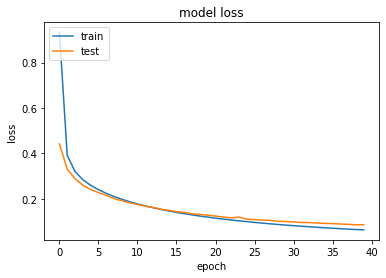

In [13]:
Show_History(history)